In [34]:
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Data is stored in a DMatrix object

Importing the dataset

In [8]:
dataset = pd.read_csv('smaller_dataset_ICA.csv')

In [9]:
dataset.head()

,X1,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,ratio012,...,DIO,DPO,DSO,turnover,status,nace,ratio036,ratio037,ratio039,ratio040
0,14,180.39,0.00,1.01,1.06,1.06,2.25,-48.31,0.00,-0.79,...,1,283,0,3437,1,4941,1,1,1,1
1,18,3.73,0.21,1.27,1.41,1.35,1.89,13.57,0.11,0.27,...,7,61,75,1991,1,1330,0,0,1,0
2,21,0.19,0.00,6.18,3.28,3.28,1.79,-17.72,-0.28,-0.36,...,0,5,27,1739,1,4646,1,1,1,1
3,25,-1.49,0.00,0.33,0.10,0.10,-2.73,-53.41,-0.79,-0.39,...,0,0,0,1499,1,9313,1,1,1,1
4,31,-1.21,0.00,0.17,0.14,0.14,-28.95,-58.08,-1.02,-0.23,...,0,444,0,1244,1,4759,1,1,1,1


Keeping information from column ratio001 until status

In [10]:
df = dataset.iloc[:,1:21]
df.head()

,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,ratio012,ratio017,ratio018,ratio019,ratio027,ratio029,ratio030,DIO,DPO,DSO,turnover,status
0,180.39,0.00,1.01,1.06,1.06,2.25,-48.31,0.00,-0.79,1.08,0.87,-0.02,277.13,0.00,0.00,1,283,0,3437,1
1,3.73,0.21,1.27,1.41,1.35,1.89,13.57,0.11,0.27,1.72,1.70,0.07,21.40,0.10,0.10,7,61,75,1991,1
2,0.19,0.00,6.18,3.28,3.28,1.79,-17.72,-0.28,-0.36,5.02,5.64,-0.06,-16.50,-0.05,-0.05,0,5,27,1739,1
3,-1.49,0.00,0.33,0.10,0.10,-2.73,-53.41,-0.79,-0.39,0.95,0.85,-0.02,-42.31,-0.66,-0.74,0,0,0,1499,1
4,-1.21,0.00,0.17,0.14,0.14,-28.95,-58.08,-1.02,-0.23,4.40,4.38,-0.02,-57.31,-0.23,-0.23,0,444,0,1244,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ratio001  4514 non-null   float64
 1   ratio002  4514 non-null   float64
 2   ratio003  4514 non-null   float64
 3   ratio004  4514 non-null   float64
 4   ratio005  4514 non-null   float64
 5   ratio006  4514 non-null   float64
 6   ratio008  4514 non-null   float64
 7   ratio011  4514 non-null   float64
 8   ratio012  4514 non-null   float64
 9   ratio017  4514 non-null   float64
 10  ratio018  4514 non-null   float64
 11  ratio019  4514 non-null   float64
 12  ratio027  4514 non-null   float64
 13  ratio029  4514 non-null   float64
 14  ratio030  4514 non-null   float64
 15  DIO       4514 non-null   int64  
 16  DPO       4514 non-null   int64  
 17  DSO       4514 non-null   int64  
 18  turnover  4514 non-null   int64  
 19  status    4514 non-null   int64  
dtypes: float64(15), int64(5)
memor

Checking and dropping null values

In [12]:
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4513
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ratio001  4514 non-null   float64
 1   ratio002  4514 non-null   float64
 2   ratio003  4514 non-null   float64
 3   ratio004  4514 non-null   float64
 4   ratio005  4514 non-null   float64
 5   ratio006  4514 non-null   float64
 6   ratio008  4514 non-null   float64
 7   ratio011  4514 non-null   float64
 8   ratio012  4514 non-null   float64
 9   ratio017  4514 non-null   float64
 10  ratio018  4514 non-null   float64
 11  ratio019  4514 non-null   float64
 12  ratio027  4514 non-null   float64
 13  ratio029  4514 non-null   float64
 14  ratio030  4514 non-null   float64
 15  DIO       4514 non-null   int64  
 16  DPO       4514 non-null   int64  
 17  DSO       4514 non-null   int64  
 18  turnover  4514 non-null   int64  
 19  status    4514 non-null   int64  
dtypes: float64(15), int64(5)
memor

There are no null values

In [13]:
x = df.iloc[:,0:19]
x.head()

,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,ratio012,ratio017,ratio018,ratio019,ratio027,ratio029,ratio030,DIO,DPO,DSO,turnover
0,180.39,0.00,1.01,1.06,1.06,2.25,-48.31,0.00,-0.79,1.08,0.87,-0.02,277.13,0.00,0.00,1,283,0,3437
1,3.73,0.21,1.27,1.41,1.35,1.89,13.57,0.11,0.27,1.72,1.70,0.07,21.40,0.10,0.10,7,61,75,1991
2,0.19,0.00,6.18,3.28,3.28,1.79,-17.72,-0.28,-0.36,5.02,5.64,-0.06,-16.50,-0.05,-0.05,0,5,27,1739
3,-1.49,0.00,0.33,0.10,0.10,-2.73,-53.41,-0.79,-0.39,0.95,0.85,-0.02,-42.31,-0.66,-0.74,0,0,0,1499
4,-1.21,0.00,0.17,0.14,0.14,-28.95,-58.08,-1.02,-0.23,4.40,4.38,-0.02,-57.31,-0.23,-0.23,0,444,0,1244


In [14]:
y = df["status"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 1787 to 3579
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ratio001  903 non-null    float64
 1   ratio002  903 non-null    float64
 2   ratio003  903 non-null    float64
 3   ratio004  903 non-null    float64
 4   ratio005  903 non-null    float64
 5   ratio006  903 non-null    float64
 6   ratio008  903 non-null    float64
 7   ratio011  903 non-null    float64
 8   ratio012  903 non-null    float64
 9   ratio017  903 non-null    float64
 10  ratio018  903 non-null    float64
 11  ratio019  903 non-null    float64
 12  ratio027  903 non-null    float64
 13  ratio029  903 non-null    float64
 14  ratio030  903 non-null    float64
 15  DIO       903 non-null    int64  
 16  DPO       903 non-null    int64  
 17  DSO       903 non-null    int64  
 18  turnover  903 non-null    int64  
dtypes: float64(15), int64(4)
memory usage: 141.1 KB


In [17]:
print("Shape of x training data: ",X_train.shape)
print("Shape of y training data: ",y_train.shape)

print("Shape of x testing data: ",X_test.shape)
print("Shape of y testing data: ",y_test.shape)

Shape of x training data:  (3611, 19)
Shape of y training data:  (3611,)
Shape of x testing data:  (903, 19)
Shape of y testing data:  (903,)


/Logistic Regression Model

In [18]:
logregModel = LogisticRegression()

In [19]:
logregModel.fit(X_train, y_train)

C:\Users\Ren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [20]:
logreg_predict_train = logregModel.predict(X_train)
print("\nTarget on train data", logreg_predict_train)

logreg_accuracy_train = accuracy_score(y_train, logreg_predict_train)
print("\nAccuracy score on training dataset: ", logreg_accuracy_train)


Target on train data [0 0 0 ... 0 0 0]

Accuracy score on training dataset:  0.8919966768208253


In [21]:
logreg_y_pred = logregModel.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.4f}".format(logregModel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.8992


/Basic XGBoost

Creating the object of the XGBoost model

In [22]:
xgb_model = XGBClassifier()

In [23]:
xgb_model.fit(X_train, y_train)

C:\Users\Ren\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
# predict the target on the train dataset
xgb_predict_train = xgb_model.predict(X_train)
print("\nTarget on train data", xgb_predict_train)


Target on train data [0 0 0 ... 0 0 0]


C:\Users\Ren\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [25]:
xgb_accuracy_train = accuracy_score(y_train, xgb_predict_train)
print("\nAccuracy score on training dataset: ", xgb_accuracy_train)


Accuracy score on training dataset:  1.0


In [26]:
xgb_predict_test = xgb_model.predict(X_test)
#print("\nTarget on test data", predict_test)

C:\Users\Ren\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [27]:
xgb_accuracy_test = accuracy_score(y_test, xgb_predict_test)
print("\nAccuracy score on test dataset: ",xgb_accuracy_test)


Accuracy score on test dataset:  0.9069767441860465


*Comparing accuracy

C:\Users\Ren\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Ren\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


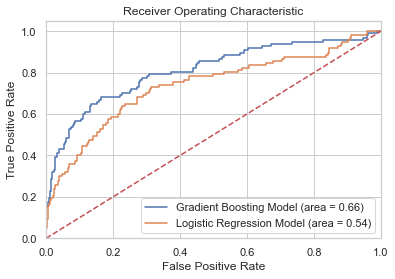

In [28]:
# XGBoost
XGBlogit_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test))
XGBfpr, XGBtpr, XGBthresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])

# LogReg
# XGBoost
LRlogit_roc_auc = roc_auc_score(y_test, logregModel.predict(X_test))
LRfpr, LRtpr, LRthresholds = roc_curve(y_test, logregModel.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(XGBfpr, XGBtpr, label = "Gradient Boosting Model (area = %0.2f)" % XGBlogit_roc_auc)
plt.plot(LRfpr, LRtpr, label = "Logistic Regression Model (area = %0.2f)" % LRlogit_roc_auc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

Shapley values

In [29]:
import shap

In [30]:
shap.initjs()

In [63]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)
i = 168
shap.force_plot(explainer.expected_value, shap_values[i],
               features = X_train.loc[i], feature_names = X_train.columns)

Global interpretation using Shapley values by looking at it in a combined form

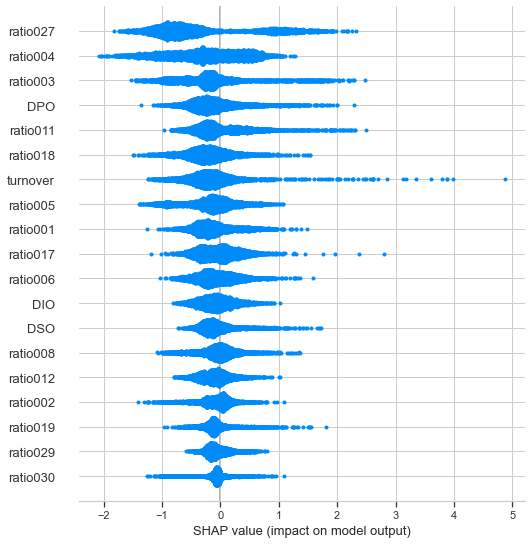

In [32]:
shap.summary_plot(shap_values, feature_names = X_train.columns)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

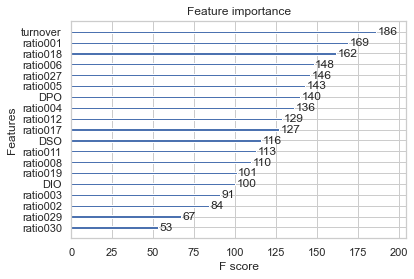

In [35]:
xgb.plot_importance(xgb_model)